Microsoft Movie Studio


Authors: Christine Waituika

1. BUSINESS UNDERSTANDING

Link to Github Repository: 

1.1 UNDERSTANDING THE PROBLEM

This repo helps to explore relationships between runtime, budget, genre, TMDB average vote score, and ROI. The best movies for optimizing ROI are short, low budget horror/thriller movies. These tend to have lower reviews however.The best movies for optimizing vote score and total profit are long, high budget, Action/SciFi or Action/Adventure movies. These still have ROI much higher than average movie, but may require expensive IP. Short, high budget, Animation/Adventure/Comedy movies also do very well according to all three metrics (ROI, total profit, and vote score)

1.2 PROBLEM STATEMENT

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions to consider:

Is movie making money? Yes, more movie making money than losing money few chart show result by number of moive, budget, gross.
What type movie making more money? What's the genre, duration(how long), budget, studio, director and writer, actor. experienc, etc.
What are the business's pain points related to this project? Total lack of direction
How did you pick the data analysis question(s) that you did? Microsoft definitely has plenty of money to jump in on the big budget movies immediately, but without knowing the quality of their other investment opportunities and given they have an exisitng brand that is very valuable, I wanted to present a balanced approach that considers ROI, total profit, and also "quality".
Why are these questions important from a business perspective?
ROI is important to decide which movie making ventures make sense to fund vs. using the money in other Microsoft projects.
Total profit is important in understanding the total amount of money that can be made making movies.
Vote average may be important to Microsoft's brand, depending on how clearly the movie studio is associated with the parent company. Being associated with cheap or low quality things may damage Microsoft overall, even if the movies make them more money.

2. DATA UNDERSTANDING

2.1 DATA COLLECTION

The data was collected from the folder zippedData. In the folder zippedData in the associated GitHub repository are movie datasets from: Box Office Mojo, IMDB, Rotten Tomatoes and TheMovieDB.org.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading Data

In [2]:
! ls

CONTRIBUTING.md
LICENSE.md
README.md
Viz.ipynb
awesome.gif
bom_missing.jpeg
im.db.zip
movie_data_erd.jpeg
prep.ipynb
student.ipynb
zippedData


In [3]:
import sqlite3 
conn = sqlite3.connect('zippedData/im.db.zip')

In [4]:
cur = conn.cursor()

In [5]:
from zipfile import ZipFile
with ZipFile('zippedData/im.db.zip', 'r') as imdb:
    imdb.extractall('temp')
print('File is in temp')

File is in temp


In [6]:
import sqlite3 
conn = sqlite3.connect('temp/im.db')

In [7]:
cur = conn.cursor()

In [8]:
# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [9]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [10]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [11]:
def load_data(path, data_format):
    if data_format.lower() == "csv":
        data = pd.read_csv(path, index_col = 0)
    elif data_format.lower() == "excel":
        data = pd.read_excel(path)
    return data



In [12]:
bom_data = load_data("zippedData/bom.movie_gross.csv.gz", "csv")
bom_data.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


DATA UNDERSTANDING

In [13]:
#general description of the data
def general_description(data):
    output = data.info()
    
    return output

In [14]:
#general description of box office mojo movies
general_description(bom_data)

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [15]:
#general description of imdb movies ratings
general_description(movie_ratings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
#general description of imdb movies
general_description(movie_basics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
#statistical description of box office mojo
bom_data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [18]:
#statistical description of imdb movies
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [19]:
#statistical description of imdb movie ratings
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


# DATA CLEANING

### Missing Values

In [20]:
#checking for missing values
def missing_values(data):
    miss_val = data.isnull().sum().sort_values(ascending = False)
    
    # percentage of missing values
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    
    #create dataframe for missing values
    missing_df = pd.DataFrame({"Total Missing Values": miss_val, "Percentage(%)": percentages})
    
    #if the percentage == 0 implies no missing values
    missing_df.drop(missing_df[missing_df["Percentage(%)"] == 0].index, inplace=True)
    
    return missing_df

In [21]:
#missing values for box office mojo
missing_values(bom_data)

,Total Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [22]:
#missing values for imdb movie basics
missing_values(movie_basics)

,Total Missing Values,Percentage(%)
runtime_minutes,31739,0.217176
genres,5408,0.037005
original_title,21,0.000144


In [23]:
bom_missing_val_percent = missing_values(bom_data)
bom_missing_val_percent

,Total Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [24]:
#missing values for imdb movie ratings
missing_values(movie_ratings)

,Total Missing Values,Percentage(%)


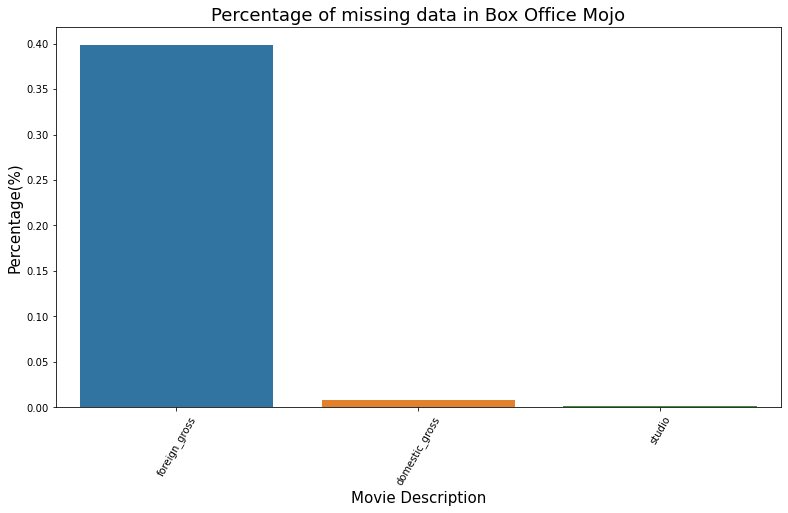

In [25]:
#graphical representaiton of missing values
ax, bar = plt.subplots(figsize=(13, 7))
#barchart using seaborn
sns.barplot(x=bom_missing_val_percent.index, y=bom_missing_val_percent["Percentage(%)"])
#label the axis
plt.xlabel("Movie Description", fontsize = 15)
plt.ylabel("Percentage(%)", fontsize = 15)
plt.xticks(rotation="60")
#title
plt.title("Percentage of missing data in Box Office Mojo", fontsize = 18)
#display the graph
plt.show()
ax.savefig("bom_missing.jpeg")

* Foreign gross has the highest number of missing values

### Duplicate Values

In [26]:
bom_data.duplicated()

title
Toy Story 3                                    False
Alice in Wonderland (2010)                     False
Harry Potter and the Deathly Hallows Part 1    False
Inception                                      False
Shrek Forever After                            False
                                               ...  
The Quake                                      False
Edward II (2018 re-release)                    False
El Pacto                                       False
The Swan                                       False
An Actor Prepares                              False
Length: 3387, dtype: bool

In [27]:
movie_basics.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool

In [28]:
movie_ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [29]:
movie_basics.shape

(146144, 6)

In [30]:
movie_basics.dropna(axis=0, how='any', inplace= True)

## Question 1: What are the top 10 rated movies?

In [31]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [32]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [33]:
movie_ratings.sort_values(by = "averagerating", ascending= False)

,movie_id,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6
...,...,...,...
50971,tt6017238,1.0,21
32440,tt2087999,1.0,7
36456,tt1896768,1.0,21
54856,tt1976600,1.0,436


In [34]:
movie_ratings[movie_ratings.averagerating == 10].head()

,movie_id,averagerating,numvotes
6784,tt5390098,10.0,5
7017,tt6295832,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
27644,tt8730716,10.0,5


In [35]:
top_ten_ratings = movie_ratings.sort_values(by = "averagerating", ascending= False).head(10)

## Question 2: How the runtime of movies has changed over the years   

In [36]:
movie_basics=movie_basics[movie_basics['runtime_minutes']>40]

In [37]:
movie_basics.describe()

,start_year,runtime_minutes
count,106801.000000,106801.000000
mean,2014.381588,89.646988
std,2.648777,171.406081
min,2010.000000,41.000000
25%,2012.000000,73.000000
50%,2014.000000,88.000000
75%,2017.000000,100.000000
max,2022.000000,51420.000000


<function matplotlib.pyplot.show(close=None, block=None)>

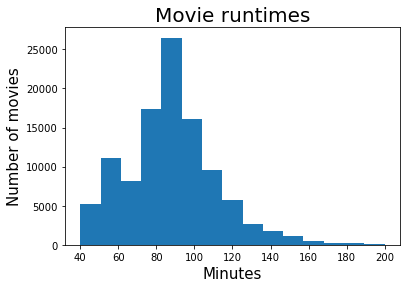

In [38]:
plt.hist(movie_basics['runtime_minutes'],range=(40, 200), bins = 15)
plt.title('Movie runtimes', fontsize = 20)
plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.show

### We can see that most movies have a runtime between 80 to 110 minutes.

In [39]:
grouped_movies=movie_basics['runtime_minutes'].groupby(movie_basics['start_year']).describe()

In [40]:
avg_runtime_by_year = grouped_movies['mean']
avg_runtime_min = grouped_movies['mean'] - grouped_movies['std']
avg_runtime_max = grouped_movies['mean'] - grouped_movies['std']

<function matplotlib.pyplot.show(close=None, block=None)>

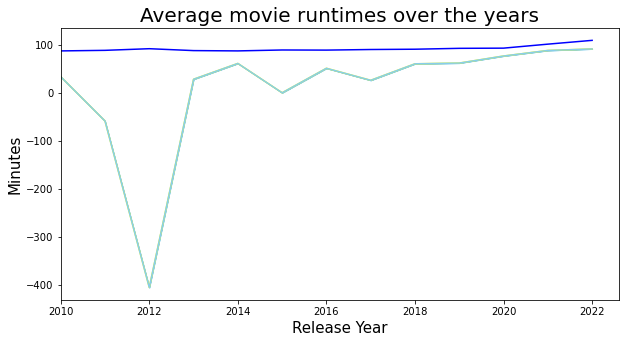

In [41]:
fig, x = plt.subplots(figsize=(10,5))
x.plot(avg_runtime_by_year, color = "blue")
x.plot(avg_runtime_min, color = "yellow")
x.plot(avg_runtime_max, color = "skyblue")
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color = "skyblue")
x.set_title('Average movie runtimes over the years', fontsize = 20)
x.set_xlabel('Release Year', fontsize = 15)
x.set_ylabel('Minutes', fontsize = 15)
x.set_xlim(2010)
plt.show

In [42]:
movies_by_decades = movie_basics.copy()
movies_by_decades['start_year'] = ((movies_by_decades['start_year'] // 10) * 10 ).astype('int64')

<function matplotlib.pyplot.show(close=None, block=None)>

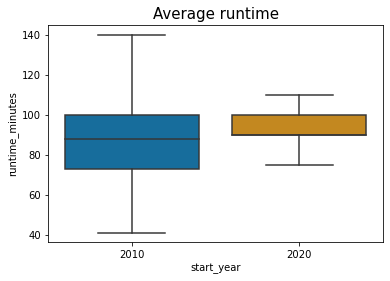

In [43]:
sns.boxplot(x = 'start_year', y = 'runtime_minutes', data = movies_by_decades, palette = 'colorblind', showfliers = False)
plt.title('Movies\' runtime over the decade', fontsize = 18)
plt.title('Decades', fontsize = 15)
plt.title('Average runtime', fontsize = 15)
plt.show

##  Question: What are the longest and shortest movies

In [44]:
print(movie_basics.original_title[movie_basics.runtime_minutes == movie_basics.runtime_minutes.max()])
print(movie_basics.runtime_minutes[movie_basics.runtime_minutes == movie_basics.runtime_minutes.max()])

132389    Logistics
Name: original_title, dtype: object
132389    51420.0
Name: runtime_minutes, dtype: float64


In [45]:
print(movie_basics.original_title[movie_basics.runtime_minutes == movie_basics.runtime_minutes.min()])
print(movie_basics.runtime_minutes[movie_basics.runtime_minutes == movie_basics.runtime_minutes.min()])

8837      Sea Rex 3D: Journey to a Prehistoric World
10039                                   Out at Lunch
11074                         Capital for the Canopy
12166                         Poor, White and Stupid
13179                              Manning the Baton
                             ...                    
124117    Maya Angelou Reflections of a Blessed Soul
129740                             The Coming Storms
130193                           Education Explorers
137134                       The Billion Dollar Bust
137465                       Strain Hunters Malawi I
Name: original_title, Length: 87, dtype: object
8837      41.0
10039     41.0
11074     41.0
12166     41.0
13179     41.0
          ... 
124117    41.0
129740    41.0
130193    41.0
137134    41.0
137465    41.0
Name: runtime_minutes, Length: 87, dtype: float64


### The longest movie from the given dataset is: 'Logistics' with a runtime of 51420 minutes.

### The shortest movies are: